# Visulizing The Gender Gap in College Degrees 
[The National Center for Education Statistics](https://nces.ed.gov/programs/digest/2013menu_tables.asp) releases datasets related to eduction. In this project we are working with data containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set contains up to 17 degrees categories, each column as a seperate degree.

Randal Olsen, a data scientist at the University of Pennsylvania, has cleaned the data and made it [available](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv) on his webside.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

In [2]:
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


### Biology degrees 
From the plot, we can tell that Biology degrees increased steadily from 1970 and peaked in the early 2000's. We can also tell that the percentage has stayed above 50% since around 1987. If we want the gender gap to be apparent and emphasized in the plot, we need a visual analogy to the difference in the percentages between the genders.

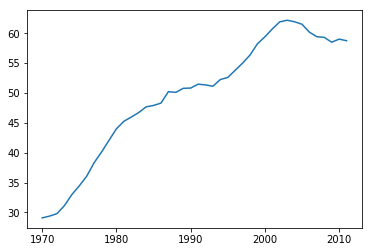

In [3]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
plt.plot(women_degrees["Year"], women_degrees["Biology"])

plt.show()

In the first period, from 1970 to around 1987, women were a minority in Biology and men the majority. From around 1987 to around 2012, women became the majority. 

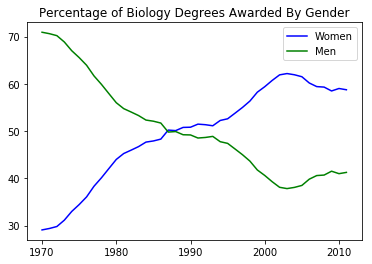

In [4]:
plt.plot(women_degrees["Year"], women_degrees["Biology"], c = "blue")
plt.plot(women_degrees["Year"], 100 - women_degrees["Biology"], c = "green")
plt.title("Percentage of Biology Degrees Awarded By Gender")
plt.legend(["Women", "Men"], loc = "upper right")
plt.show()

### STEM degrees
In the following figure will can conclude that the gender gap in Computer Science, Engineering and Psychology have big gender gaps while the gap in Biology,  Math and Statistics and Physical Sciences is quite small. In addition, the first two degrees, Computer Science and Engineering, are dominated by men while Psychology is dominated by women. The other degree categories are much more balanced. 

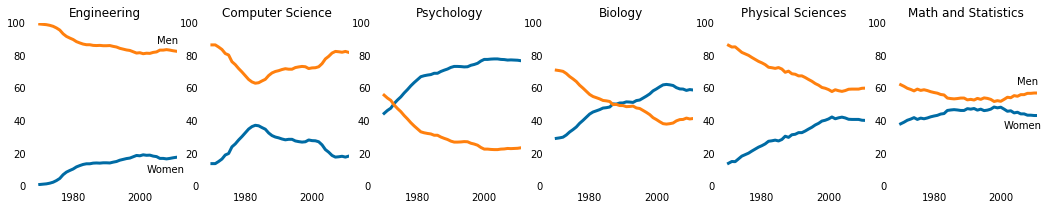

In [7]:
import warnings
warnings.filterwarnings('ignore')

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

### All degrees
In the below figure you have in the first column all STEM degree categories. In the second column the Liberal Arts degrees, and in the last all other.

Seeing the full picture shows that in a lot of degree categories women have the majority (Health Professions, Education etc) with big gender gaps. 

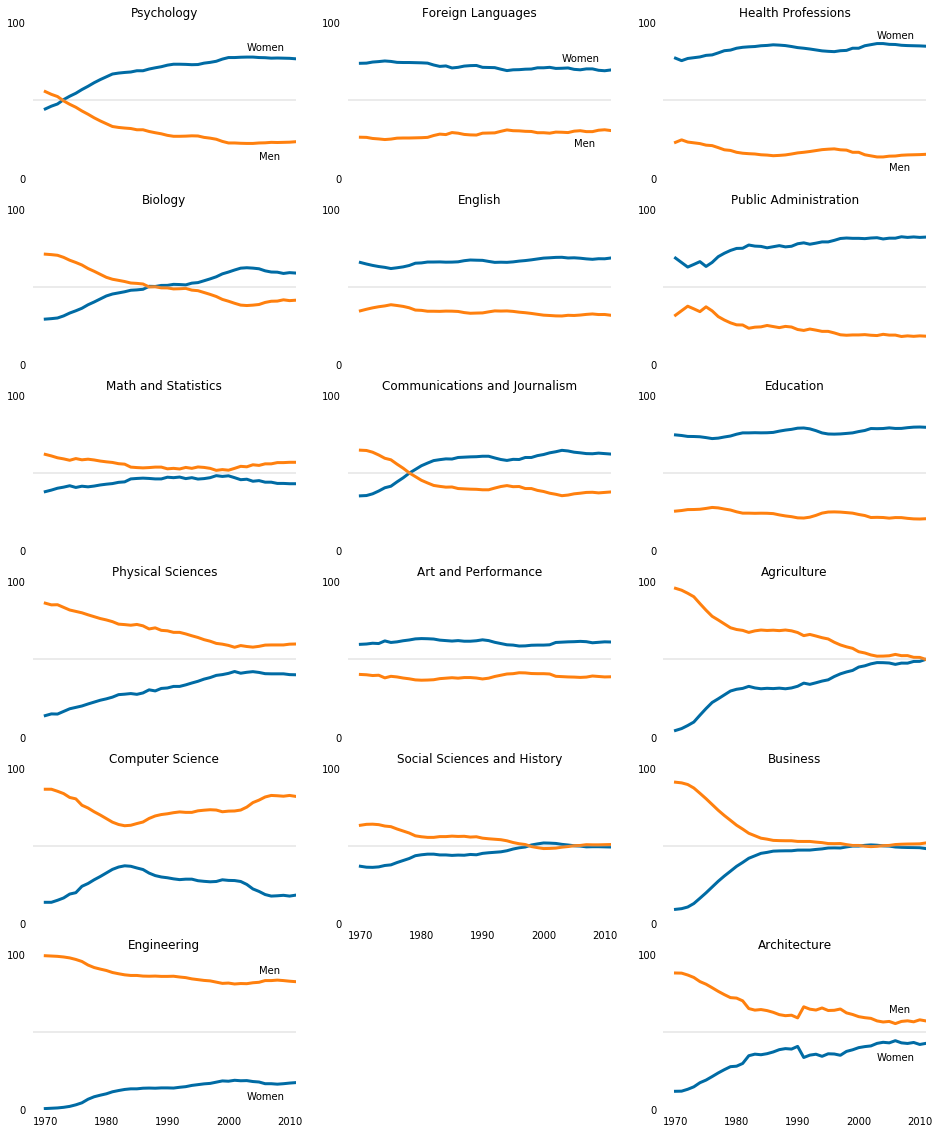

In [8]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

fig = plt.figure(figsize = (16, 20))

# generate first column of line charts. Stem degrees
for col in range(0,18, 3):
    cat_index = int(col/3)
    ax = fig.add_subplot(6, 3, col +1)
    ax.plot(women_degrees["Year"], women_degrees[stem_cats[cat_index]], c = cb_dark_blue, label = "Women", linewidth = 3)
    ax.plot(women_degrees["Year"], 100 - women_degrees[stem_cats[cat_index]], c = cb_orange, label = "Men", linewidth = 3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(labelbottom = "off", bottom = "off", top = "off", left = "off", right = "off")
    ax.set_yticks([0,100])
    ax.axhline(50, c = (171/255, 171/255, 171/255), alpha = 0.3)
    if col == 0:
        ax.text(2003, 82, "Women")
        ax.text(2005, 12, "Men")
    elif col == 15:
        ax.text(2005, 88, "Men")
        ax.text(2003, 7, "Women")
        ax.tick_params(labelbottom = "on")

# generate second column of line charts. Liberal arts degrees
for col in range(2,16,3): 
    cat_index = int(col/3)
    ax = fig.add_subplot(6, 3, col)
    ax.plot(women_degrees["Year"], women_degrees[lib_arts_cats[cat_index]], c = cb_dark_blue, label = "Women", linewidth = 3)
    ax.plot(women_degrees["Year"], 100 - women_degrees[lib_arts_cats[cat_index]], c = cb_orange, label = "Men", linewidth = 3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(labelbottom = "off", bottom = "off", top = "off", left = "off", right = "off")
    ax.set_yticks([0,100])
    ax.axhline(50, c = (171/255, 171/255, 171/255), alpha = 0.3)
    if col == 2:
        ax.text(2003, 75, "Women")
        ax.text(2005, 20, "Men")
    if col == 14:
        ax.tick_params(labelbottom = "on")

# generate third column of line charts. Other categories degrees
for col in range(3,20,3):
    cat_index = int(col/3.5)
    ax = fig.add_subplot(6, 3, col)
    ax.plot(women_degrees["Year"], women_degrees[other_cats[cat_index]], c = cb_dark_blue, label = "Women", linewidth = 3)
    ax.plot(women_degrees["Year"], 100 - women_degrees[other_cats[cat_index]], c = cb_orange, label = "Men", linewidth = 3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(labelbottom = "off", bottom = "off", top = "off", left = "off", right = "off")
    ax.set_yticks([0, 100])
    ax.axhline(50, c = (171/255, 171/255, 171/255), alpha = 0.3)
    if col == 3:
        ax.text(2003, 90, "Women")
        ax.text(2005, 5, "Men")
    elif col == 18:
        ax.text(2005, 63, "Men")
        ax.text(2003, 32, "Women")
        ax.tick_params(labelbottom = "on")
plt.savefig("gender_degrees.png") # save the fig as png
plt.show()